In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import os
import datetime

# For how to import the scripts folder so that it can be used:
# https://stackoverflow.com/questions/53049195/importing-custom-module-into-jupyter-notebook
# https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
sys.path.append('../scripts')

import project_functions
# relative import did not work for some reason
#from .. import project_functions

pathToData = '../../data/raw/ks-projects-201801.csv'

dfj = project_functions.load_and_process(pathToData, 'Jacob')
dfr = project_functions.load_and_process(pathToData, 'Rylan')

## Task 3 | Exploratory Data Analysis | Jacob

The info function gives information on all the columns and there associated types. The result shows that the 'load_and_process' function of the data pipeline has worked correctly as the new **'stateInt'** (int64), **'duration'** (timedelta64)\[ns\], and **'durationInt'** (int 64) columns have been created with the correct types.

In [ ]:
dfj.info()

This function shows the number of unique values for each column.

In [ ]:
print(dfj.nunique(axis=0))

In [ ]:
print(dfj.describe())

This plot shows the distribution of Kickstarter projects based on the duration of the project. Interestingly, this shows that 1 month long projects are the majority of projects composing about 47% of all projects. 2 month long and 1.5 month long projects are the next most common.

In [ ]:

axes = sns.displot(data=dfj[dfj['durationInt'].between(0, 90)], x='durationInt', aspect=2.0, bins=50).set(title='Distribution of Kickstarter Projects by Count')
#axes = sns.displot(data=df, x='durationInt', aspect=2.0)
axes.set_axis_labels('Duration of Kickstarter Project', 'Count')
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
axes.set(xticks=np.arange(0, 90, 5))


# Learned how to use 'stat' parameter to get bins by probability and not count from user miro from here:
# https://stackoverflow.com/questions/40092294/creating-a-matplotlib-or-seaborn-histogram-which-uses-percent-rather-than-count
axes = sns.displot(data=dfj[dfj['durationInt'].between(0, 90)], x='durationInt', aspect=2.0, bins=50, stat='probability').set(title='Distribution of Kickstarter Projects by Probability')
axes.set_axis_labels('Duration of Kickstarter Project', 'Probability')
axes.set(xticks=np.arange(0, 90, 5), yticks=np.arange(0,1.1,0.1))

Here is another interesting plot which shows the distribution of the different possible states of a project. Since my research question is focused on how the duration of a project affects it success, I am going to focus on projects which have the states of 'failed/canceled' or 'successful'. The other states do not provide information about the success so they will be filter out.

In [ ]:
sns.countplot(x='state', data=dfj)

In [ ]:
# Learned how to change seaborn plot size from user 'student' here:
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(16,8.27)})
box1 = sns.boxplot(data=dfj[dfj['durationInt'].between(0, 90)], y='durationInt', x='main_category')
box1.set(yticks=np.arange(0,90,5))
print()

In [ ]:
sns.pairplot(dfj)

## Task 3 | Exploratory Data Analysis | Rylan

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import sys

sys.path.append('../scripts')

import project_functions

dfr = project_functions.load_and_process('../../data/raw/ks-projects-201801.csv', "Rylan")

In [ ]:
dfr.shape

In [ ]:
dfr.head()

In [ ]:
dfr.columns

In [ ]:
dfr.nunique(axis=0)

In [ ]:
dfr.describe().apply(lambda s: s.apply('{0:.5f}'.format))
#https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation/47207283

In [ ]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='pledged',estimator=np.sum)
#https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
#https://www.youtube.com/watch?v=6GUZXDef2U0&ab_channel=DerekBanas

In [ ]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='pledged',estimator=np.mean)

In [ ]:
sns.set(rc={'figure.figsize': (15,10)})
sns.barplot(data=dfr,x='category',y='plus_minus',estimator=np.sum)

## Task 4 | Research Question Analysis | Jacob

<div style='color:blue; font-size:15pt'>Jacob's research question: Does the duration of a Kickstarter project affect its success?</div> 

---

One way to test this research question is to create a correlation matrix where the correlation between each pair of numeric variables in the dataset can be seen.

In [ ]:
import seaborn as sns
corr = dfj.corr()
sns.heatmap(corr, annot=True, cmap='winter')

In this plot, I am interested in the correlation between how funded the project was (percentFunded) and the duration of the project (durationInt). Here it shows a correlation of -0.024 which is a strong first indicator that the duration of the Kickstarter project may not affect its success.

Here is another plot which helps show visually that duration of the project doesn't seem to be strongly correlated with the success of the project. Interestingly we can see that the amount of projects increases around 100%, but before 100% the amount of projects is not as many. I think this may be because once a project is close to being funded (80%-90%) it may be that more backers will fund the project to push it to reach 100% since it is so close.

In [ ]:
df2 = dfj[dfj['percentFunded'].between(0, 200)]
sns.jointplot(data=df2, x='durationInt', y='percentFunded')

Here is one of the main plots for this investigation. It shows the probability of success of the project versus how long the project's funding time was. It shows that there indeed is a variance in the success of projects based on how long they run. Interestingly, there are two main peaks for highest success. One ata around ~10 days and another at ~66 days.

In [ ]:
# Plot probability of success vs. project funding time length
df2 = project_functions.prepareDfForProbSuccessVSDuration(dfj)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot
df2.plot(kind='bar', x='formattedTimeIntervals', y='stateInt', ylabel='Probability of Success', xlabel='Duration of Project', ylim=(0,1), legend=False, title='Probability of Success vs. Project Funding Time Length')


This part gets the probability of success for projects that have a funding time in between 63 and 70 days and plots it by category.

Name                644
category             50
main_category        15
currency              1
deadline            361
launched            644
pledged             476
state                 3
backers             149
country               1
usd_pledged_real    476
usd_goal_real       134
stateInt              2
duration            644
percentFunded       514
durationInt           7
dtype: int64
mean: 0.42857142857142855


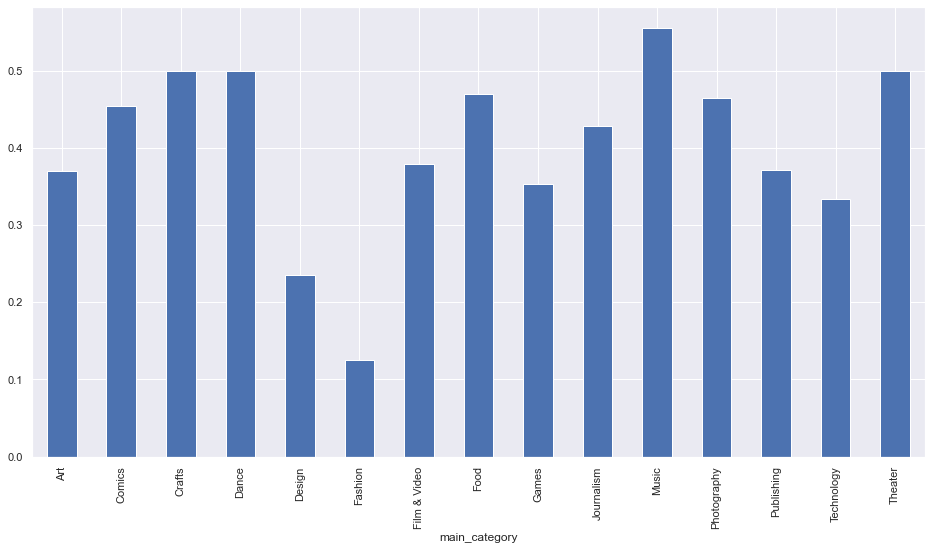

In [8]:
dfNew = project_functions.getProjectsWithDurationInTimeRange(dfj, 63, 70)
dfNew = project_functions.getProjectsAsFailedOrSuccessful(dfNew)
print(dfNew.nunique(axis=0))
print(f"mean: {dfNew['stateInt'].mean()}")
dfTest = dfNew.groupby('main_category')['stateInt'].mean().plot(kind='bar')

In [ ]:

dfNew2 = project_functions.getProjectsWithDurationInTimeRange(dfj, 7, 14)
dfNew2 = project_functions.getProjectsAsFailedOrSuccessful(dfNew2)
dfTest2 = dfNew2.groupby('main_category')['stateInt'].mean().plot(kind='bar')

Index(['stateInt', 'duration2', 'category2'], dtype='object')


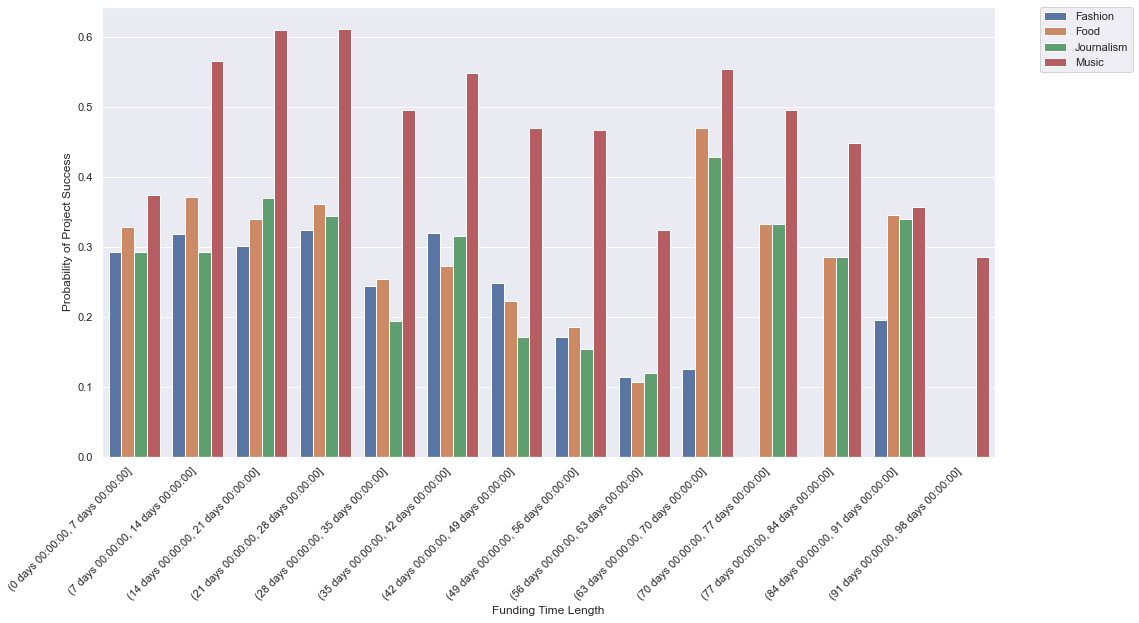

In [7]:
import matplotlib.pyplot as plt

# Learned how to change seaborn plot size from user 'student' here:
# https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
sns.set(rc={'figure.figsize':(16,8.27)})

dfByCategory = project_functions.prepareDfForProbSuccessVSDurationByCategories(dfj)

a = sns.barplot(data=dfByCategory, x='duration2', y='stateInt', hue='category2')
# for help rotating x_tick labels:
# https://stackoverflow.com/questions/61368851/how-to-rotate-seaborn-barplot-x-axis-tick-labels
a.set_xticklabels(a.get_xticklabels(), rotation=45, horizontalalignment='right')
# https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
a.set(xlabel='Funding Time Length', ylabel='Probability of Project Success')

#plt.legend(loc='upper left')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Based on the inital correlation matrix, it seemed as though there wasn't a relationship between the project funding duration and the probability of the project's success. **However, after ploting the probability of success vs project duration there did seem to be a relationship, although non-linear**. Because the relationship is non-linear that may be why the correlation matrix did not show a relationship between the two variables. Based on the graphs, the project success peaks if it has a > 1 week < 4 week duration. This makes sense as if a project doesn't have too long to be funded it may incentivised a potential backer to back right away lessening the probability that they forget about the project. Also project success dips somewhat lower if it is < 1 week and this also makes sense. If a project only has a funding duration of 1 week less people are likely to be able to see it and the news of the project may not reach enough people.

The probability of success vs funding time curve also seemed to be a similar shape for most categories peaking at ~10 days and having a lowest point at ~60 days. Although the overall probability of success varied between categories, which can be seen by the curve being 'squashed' for lower probability categories and 'stretched' for higher probability categories.

## Task 4 | Research Question Analysis | Rylan

Rylan's research question: Which categories have the most successful dollar spent?